# Final Project

## Python for Data Analysis Training Program

Written by Team "Diversity-in-Tech" in March-April 2020

## 1. Introduction

__Instructions from Final_Project.pdf:__
- Introduces the reader to the topic and the broad context within which your project fits
- What do you hope to learn from the project?
- What question is being addressed?
- Why is this important? (motivation)

## 2. Dataset

__Instructions from Final_Project.pdf:__
- Briefly describe your data

The dataset can be found at: https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv

## 3. Preprocessing

__Instructions from Final_Project.pdf:__
- Explain your whole approach

### 3.1 Preparing the Dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the CSV file
url_tech = 'https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv'

In [3]:
# Reading the file
tech = pd.read_csv(url_tech, index_col=[0])

In [4]:
# Checking the contents
tech.head()

,Company,Num. of Female Engineers,male_eng,Total Engineers,Percent Female Engineers,Total Employees,Location,Funding (Mil),Category,Website,grace_hopper
key,,,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software,http://www.37signals.com,NaN
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,http://www.7digital.com,NaN
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,http://www.activison.com,NaN
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,http://www.adzerk.com,NaN
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,http://www.airbnb.com,YES


In [5]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 37signals to zerocater
Data columns (total 11 columns):
Company                     122 non-null object
Num. of Female Engineers    122 non-null int64
male_eng                    122 non-null int64
Total Engineers             122 non-null int64
Percent Female Engineers    122 non-null float64
Total Employees             121 non-null float64
Location                    120 non-null object
Funding (Mil)               121 non-null float64
Category                    121 non-null object
Website                     121 non-null object
grace_hopper                9 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 11.4+ KB


In [6]:
tech.shape

(122, 11)

In [7]:
# Describing the dataset
tech.describe()

,Num. of Female Engineers,male_eng,Total Engineers,Percent Female Engineers,Total Employees,Funding (Mil)
count,122.000000,122.000000,122.000000,122.000000,121.000000,121.000000
mean,8.819672,62.795082,71.614754,16.571885,296.752066,78.820529
std,50.035032,355.165005,405.057009,16.678773,1535.100981,422.906491
min,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
25%,1.000000,6.000000,7.000000,6.260000,25.000000,0.650000
50%,2.000000,16.000000,18.500000,13.535000,66.000000,10.500000
75%,5.000000,29.000000,34.250000,21.072500,162.000000,31.200000
max,553.000000,3907.000000,4460.000000,100.000000,16779.000000,4596.067000


### 3.2 Data Cleaning

In this section the unnecessary columns and a sum row are dropped. Some columns are also renamed to improve the data's usability. The dataframe's contents are made uniform as well. 

In [8]:
# Drop unnecessary columns off
tech = tech.drop(columns=['Website'])
tech = tech.drop(columns=['grace_hopper'])

In [9]:
# Renaming columns
tech = tech.rename(columns = {"Num. of Female Engineers": "female_eng", "Total Engineers": "total_eng", "Percent Female Engineers": "PC_female_eng", "Total Employees": "total_employees", "Funding (Mil)": "funding_Mil"})

In [10]:
# Check NaN items
tech.isnull().sum()

Company            0
female_eng         0
male_eng           0
total_eng          0
PC_female_eng      0
total_employees    1
Location           2
funding_Mil        1
Category           1
dtype: int64

In [11]:
# Check 'ALL' in 'Company'
tech_all = tech[tech['Company'] == 'ALL']
tech_all

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
all,ALL,553,3907,4460,12.4,16779.0,NaN,4596.067,NaN


In [12]:
# Dropping row 'ALL' from 'Company'
tech = tech[tech['Company'] != 'ALL']

In [13]:
# Fillling 'null' with '0' in column total_employees
tech.total_employees=tech['total_employees'].fillna(0)

In [14]:
# Filling 'null' with '0' in column 'Location'
tech.Location=tech['Location'].fillna(0)

In [15]:
# Filling 'null' with '0' in column funding_Mil
tech.funding_Mil=tech['funding_Mil'].fillna(0)

In [16]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 37signals to zerocater
Data columns (total 9 columns):
Company            121 non-null object
female_eng         121 non-null int64
male_eng           121 non-null int64
total_eng          121 non-null int64
PC_female_eng      121 non-null float64
total_employees    121 non-null float64
Location           121 non-null object
funding_Mil        121 non-null float64
Category           121 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 9.5+ KB


In [17]:
tech['Category'].unique()

array(['Software', 'Consumer Web', 'Games/Entertainment', 'Advertising',
       'Charity/Nonprofit', 'Health/CleanTech', 'Mobile/Wireless',
       'Education', 'Consulting', 'eCommerce/Fashion', 'Enterprise',
       'News/Media', 'Social Networking', 'Finance/Venture',
       'Analytics/Big Data', 'Hardware'], dtype=object)

In [18]:
tech.isnull().sum()

Company            0
female_eng         0
male_eng           0
total_eng          0
PC_female_eng      0
total_employees    0
Location           0
funding_Mil        0
Category           0
dtype: int64

### 3.3 Exploratory Data Analysis

In this section we use Exploratory Data Analysis (EDA) to look for interesting findings. 

In [19]:
# Checking the shape of the array
tech.shape

(121, 9)

As can be seen there are 121 rows and 9 columns in the array.

In [20]:
# Checking the unique number of categories in the array
tech['Category'].unique()
len(tech['Category'].unique())

16

As shown above there are 16 categories for the companies of the array.

In [21]:
# Viewing the row in the first index position of the array
tech.iloc[0]

Company            37signals
female_eng                 0
male_eng                  20
total_eng                 20
PC_female_eng              0
total_employees           20
Location                  IL
funding_Mil                0
Category            Software
Name: 37signals, dtype: object

When viewing the company in the first index position we can have an overview of what the output looks like. At a glance it can be seen that the data cleaning has been successful. This is a good sign for the future EDA analysis.

In [22]:
# Creating a new dataframe with a new grouping
gb_tech = tech.groupby('Category')
gb_tech

A new dataframe is created for future use. It is split by company categories.

In [23]:
# Viewing the company categories by male, female and total engineers as well as by total number of employees.
gb_tech[['female_eng', 'male_eng', 'total_eng', 'total_employees']].sum()

,female_eng,male_eng,total_eng,total_employees
Category,,,,
Advertising,28,165,193,871.0
Analytics/Big Data,9,53,62,218.0
Charity/Nonprofit,9,94,103,266.0
Consulting,12,62,74,120.0
Consumer Web,174,1309,1483,6610.0
Education,20,151,171,865.0
Enterprise,28,171,199,1010.0
Finance/Venture,13,55,68,521.0
Games/Entertainment,1,29,30,706.0


It is now possible to view the company categories based on male, female and total engineers as well as by the total number of employees.

This kind of information can then be further sorted as per the needs of the end user. The sorted data is then directly usable by, for example management as it can support decision making.

In [24]:
# Rounding up to 2 points after decimal
tech.round({"funding_Mil":2})

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web
...,...,...,...,...,...,...,...,...,...
wikimedia,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit
yellowsmith,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion
yelp,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web


As seen above the percentages of company funding is rounded up to 2 decimals. Again this can assist in the viewing of the array and the data by non-data analyst readers.

In [25]:
# Resetting the Index
tech.reset_index(drop=True, inplace=True)
tech

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web
...,...,...,...,...,...,...,...,...,...
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web
119,Zendesk,8,37,45,17.78,500.0,CA,85.50,Enterprise


For future use the array's index is reset. It now runs from 0 onwards.

### 3.3.1 Correlations and Relationships

In [26]:
# Checking the correlations of the data
tech.corr()

,female_eng,male_eng,total_eng,PC_female_eng,total_employees,funding_Mil
female_eng,1.000000,0.856307,0.881807,0.041245,0.589861,0.317234
male_eng,0.856307,1.000000,0.998669,-0.173917,0.606778,0.286541
total_eng,0.881807,0.998669,1.000000,-0.154693,0.612988,0.293338
PC_female_eng,0.041245,-0.173917,-0.154693,1.000000,-0.120892,-0.103769
total_employees,0.589861,0.606778,0.612988,-0.120892,1.000000,0.440869
funding_Mil,0.317234,0.286541,0.293338,-0.103769,0.440869,1.000000


We check for any interesting correlations in the data based on the applicable columns.

As can be seen there are little findings here. The exception is the correlation of company funding with the total number of employees. This would indicate that the bigger the funding of a company is the more workforce it usually employs.

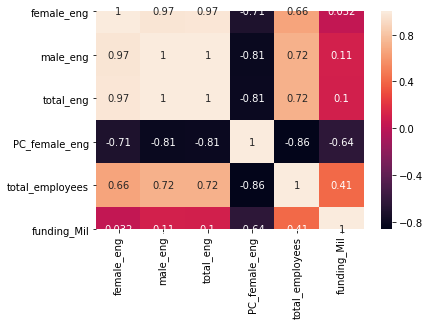

In [27]:
# Use Seaborn's heatmap to plot the correlation matrix of employees and fundings
corr_tech = tech.corr()
corr_heatmap = sns.heatmap(corr_tech.corr(), annot=True)

The correlations examined above are made more visual with the use of the Heatmap. It is worth noting that this method can add value of the data to readers who prefer a more visual output over just numbers.

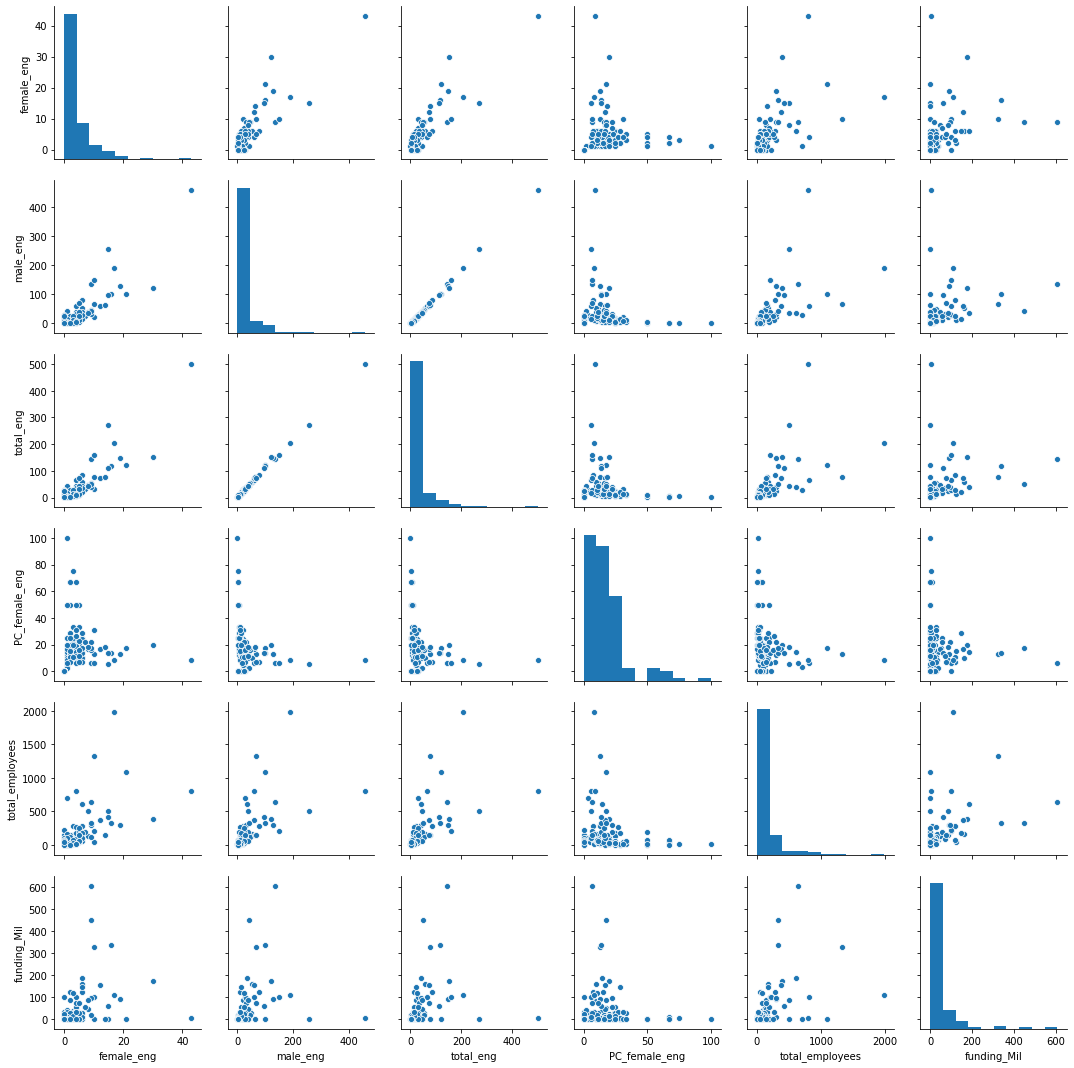

In [28]:
# Creating a pair plot to see any interesting findings
sns.pairplot(tech)

An examination of the Pair Plot allows one to look at the bigger picture and compare the plots. By the eye the relationship of company funding on females and males seems to be interesting. To have a closer look at these a pair plot can be created with fewer variables, which is done next.

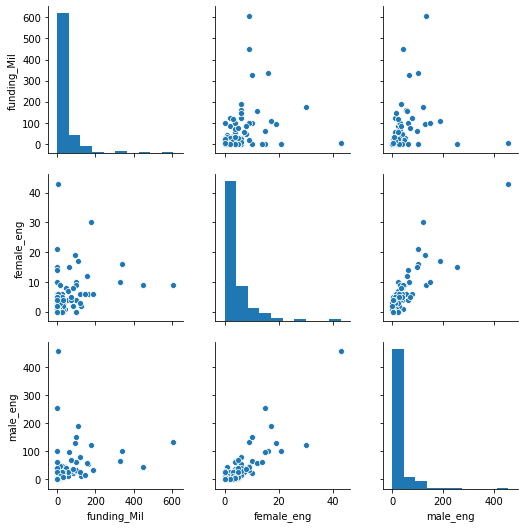

In [29]:
# A pair plot with three variables
sns.pairplot(tech, vars=['funding_Mil', 'female_eng', 'male_eng'])

The pair plot with only three variables is created for a better view. The variables chosen for the plot are company funding, number of female and male engineers.

A closer examination by eye shows that there are slight differences in the number of female and male engineers based on the funding. Specifically, it appears that as funding increases male engineers are more likely to gravitate toward better funded companies. Female engineers are slightly more stacked to companies with lesser funding.

Further reasoning as to the core causes of this difference is beyond the scope of this project. Nonetheless, it would be an area that could yield interesting results.

In [30]:
# Calculating the percentage of male engineers
tech['PC_male_eng'] = tech['male_eng']/tech['total_eng'] * 100
tech

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software,100.000000
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.238095
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.666667
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.000000
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.842105
...,...,...,...,...,...,...,...,...,...,...
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit,93.243243
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion,33.333333
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web,91.747573
119,Zendesk,8,37,45,17.78,500.0,CA,85.50,Enterprise,82.222222


In [31]:
# Rounding upto 2 points after decimal
tech.round({'PC_male_eng':2})

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software,100.00
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.24
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.67
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.00
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.84
...,...,...,...,...,...,...,...,...,...,...
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit,93.24
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion,33.33
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web,91.75
119,Zendesk,8,37,45,17.78,500.0,CA,85.50,Enterprise,82.22


The percentages of male engineers based on the total number of employees is calculated for future use.

### 3.3 Data Visualization and Uses in Reporting

### 3.3.1 Visualization of the Total Number of Female and Male Employees

While we’ve been hearing that women in tech is underrepresented, shouldn’t we verify it?

The following bar chart shows the situation at a glance.

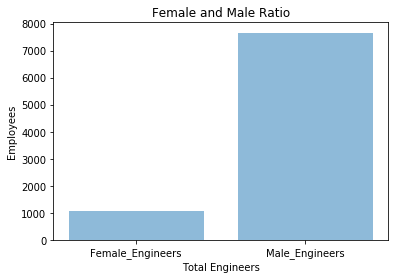

In [32]:
objects = ('Female_Engineers', 'Male_Engineers')
y_pos = np.arange(len(objects))
performance = [1076,7661]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Total Engineers')
plt.ylabel('Employees')
plt.title('Female and Male Ratio')

plt.show()

### 3.3.2 Calculating the Sums of  Engineers for Reporting Purposes

Here calculations are made to get the number of engineer employees. This is done mainly for using the totals for any potential reporting purposes.

In [33]:
tech.sum(axis=0, skipna=True)

Company            37signals7digitalActivisionAdzerkAirbnbappssav...
female_eng                                                       523
male_eng                                                        3754
total_eng                                                       4277
PC_female_eng                                                2009.37
total_employees                                                19128
funding_Mil                                                  4941.22
Category           SoftwareConsumer WebGames/EntertainmentAdverti...
PC_male_eng                                                  10090.6
dtype: object

In [34]:
Female_Engineers = tech.female_eng.sum(axis=0, skipna=True)
Female_Engineers

523

In [35]:
Male_Engineers = tech.male_eng.sum(axis=0, skipna=True)
Male_Engineers

3754

In [36]:
Total_Engineers = tech.total_eng.sum(axis=0, skipna=True)
Total_Engineers

4277

The calculations of the numbers of engineers per gender and their total are made to showcase the use of data for reporting. This allows us to add to a report or other document based on this data sentences like the following:

In [37]:
print("A study of the companies shows that there is a grand total of {} engineers.\n".format(Total_Engineers))
print("The total can be broken down by genders as follows:\n")
print("- Female Engineers: {}\n".format(Female_Engineers))
print("- Male Engineers: {}".format(Male_Engineers))
print("")

A study of the companies shows that there is a grand total of 4277 engineers.

The total can be broken down by genders as follows:

- Female Engineers: 523

- Male Engineers: 3754



It is also worth taking into account that using the automated calculations updates the numbers if the array is ever updated or otherwise modified.

### 3.3.1 Visualization of the Total Number of Female and Male Employees

While we’ve been hearing that women in tech is underrepresented, shouldn’t we verify it?

The following bar chart shows the situation at a glance.

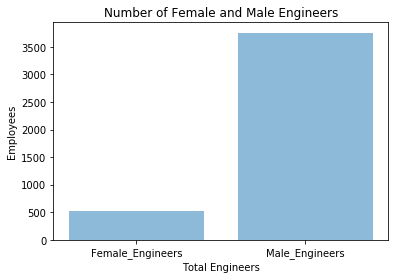

In [38]:
objects = ('Female_Engineers', 'Male_Engineers')
y_pos = np.arange(len(objects))
# performance = [523,3754]
Number = [Female_Engineers, Male_Engineers]

plt.bar(y_pos, Number, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Total Engineers')
plt.ylabel('Employees')
plt.title('Number of Female and Male Engineers')
plt.rcParams['figure.figsize']=(10,5) # Change Fig size
plt.show()

The number of female engineers is definitely lower than Male engineers. The authors hope that this gap will get reduced.

### 3.3.3 Female Engineers per Company Category

In [39]:
# The number of female engineers in each category.
tech.groupby('Category').sum().round(2)

,female_eng,male_eng,total_eng,PC_female_eng,total_employees,funding_Mil,PC_male_eng
Category,,,,,,,
Advertising,28,165,193,155.40,871.0,90.69,644.60
Analytics/Big Data,9,53,62,50.95,218.0,70.50,249.06
Charity/Nonprofit,9,94,103,64.76,266.0,91.90,235.24
Consulting,12,62,74,62.41,120.0,0.00,237.59
Consumer Web,174,1309,1483,525.58,6610.0,1392.25,2274.41
Education,20,151,171,209.96,865.0,210.12,890.04
Enterprise,28,171,199,103.69,1010.0,170.55,696.31
Finance/Venture,13,55,68,81.60,521.0,99.10,318.40
Games/Entertainment,1,29,30,3.33,706.0,0.00,96.67


In [40]:
female_eng_byCategory = tech.groupby('Category').sum()['female_eng']
female_eng_byCategory

Category
Advertising             28
Analytics/Big Data       9
Charity/Nonprofit        9
Consulting              12
Consumer Web           174
Education               20
Enterprise              28
Finance/Venture         13
Games/Entertainment      1
Hardware                16
Health/CleanTech        21
Mobile/Wireless         14
News/Media              14
Social Networking       33
Software                93
eCommerce/Fashion       38
Name: female_eng, dtype: int64

In [41]:
total_eng_byCategory = tech.groupby('Category').sum()['total_eng']
total_eng_byCategory

Category
Advertising             193
Analytics/Big Data       62
Charity/Nonprofit       103
Consulting               74
Consumer Web           1483
Education               171
Enterprise              199
Finance/Venture          68
Games/Entertainment      30
Hardware                280
Health/CleanTech        116
Mobile/Wireless         161
News/Media              111
Social Networking       254
Software                747
eCommerce/Fashion       225
Name: total_eng, dtype: int64

In [42]:
percentage = female_eng_byCategory/total_eng_byCategory*100
percentage.round(2)

Category
Advertising            14.51
Analytics/Big Data     14.52
Charity/Nonprofit       8.74
Consulting             16.22
Consumer Web           11.73
Education              11.70
Enterprise             14.07
Finance/Venture        19.12
Games/Entertainment     3.33
Hardware                5.71
Health/CleanTech       18.10
Mobile/Wireless         8.70
News/Media             12.61
Social Networking      12.99
Software               12.45
eCommerce/Fashion      16.89
dtype: float64

In [43]:
Percentage_byCategory = (female_eng_byCategory/total_eng_byCategory*100).round(2)
Percentage_byCategory

Category
Advertising            14.51
Analytics/Big Data     14.52
Charity/Nonprofit       8.74
Consulting             16.22
Consumer Web           11.73
Education              11.70
Enterprise             14.07
Finance/Venture        19.12
Games/Entertainment     3.33
Hardware                5.71
Health/CleanTech       18.10
Mobile/Wireless         8.70
News/Media             12.61
Social Networking      12.99
Software               12.45
eCommerce/Fashion      16.89
dtype: float64

Text(0.5, 1.0, 'Percentage of Female Engineers by Category')

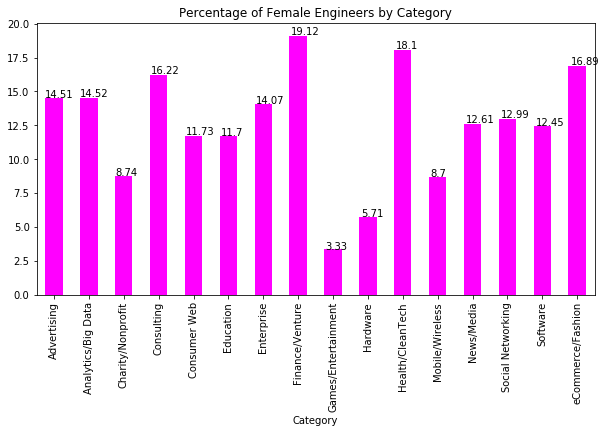

In [44]:
ax = Percentage_byCategory.plot.bar(x='Category', rot=90, color="magenta")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.rcParams['figure.figsize']=(14,10) # Change Fig size
plt.title('Percentage of Female Engineers by Category')

Around 19.5 % of Female Engineers are from `Health/Clean tech` category followed by `Finance/Venture` category, and the least percentage of Female Engineers i.e. 3.33 % are from `Games/Entertainment` category.

### 3.3.2 The Number of Female Engineers by Location

In [45]:
# Creating a new dataframe, where we
# Remove all rows from female eng with 0 values
tech_df2 = tech[(tech[['female_eng']] != 0).all(axis=1)]
tech_df2

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.238095
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.666667
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.000000
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.842105
6,Asana,3,18,21,14.29,74.0,CA,38.20,Software,85.714286
...,...,...,...,...,...,...,...,...,...,...
115,Webkite,4,4,8,50.00,14.0,PA,0.00,Consumer Web,50.000000
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit,93.243243
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion,33.333333
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web,91.747573


In [46]:
Female_Eng_byLocation = tech_df2.groupby('Location').sum()['female_eng']
Female_Eng_byLocation

Location
0              2
CA           348
IL             7
London         1
MA             9
MD             5
NC             1
NJ             2
NY            74
OR             6
PA            12
TX            15
Toronto        5
Vancouver      6
WA            30
Name: female_eng, dtype: int64

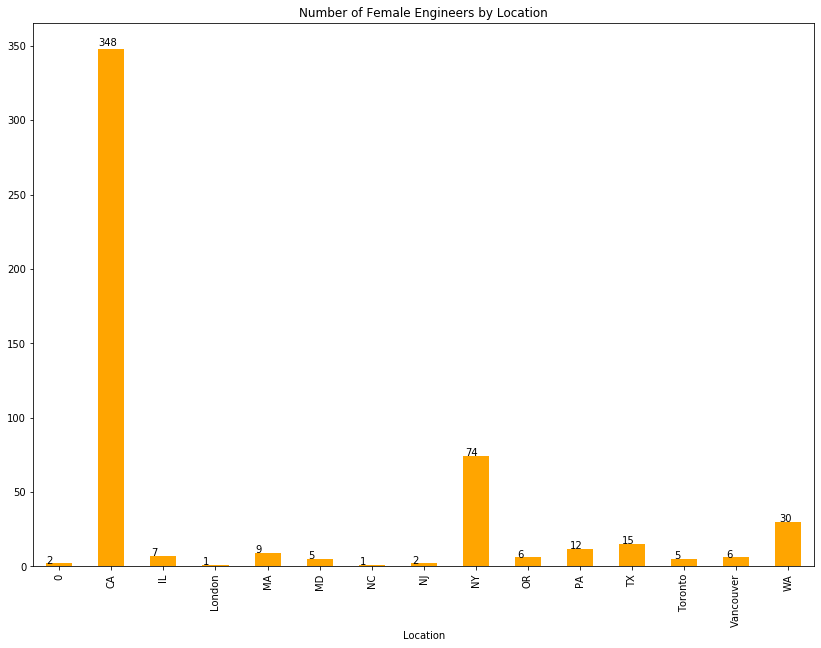

In [47]:
ax = Female_Eng_byLocation.plot.bar(x=tech_df2['female_eng'], y='Location', rot=90, color = 'Orange')
plt.rcParams['figure.figsize']=(10,6)
plt.title('Number of Female Engineers by Location')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [48]:
Total_Eng_byLocation = tech_df2.groupby('Location').sum()['total_eng']
Total_Eng_byLocation

Location
0               8
CA           2735
IL             38
London         21
MA            110
MD             22
NC              5
NJ             15
NY            490
OR             55
PA             56
TX            271
Toronto        25
Vancouver      41
WA            162
Name: total_eng, dtype: int64

In [49]:
Percentage_byLocation = (Female_Eng_byLocation/Total_Eng_byLocation * 100).round(2)
Percentage_byLocation

Location
0            25.00
CA           12.72
IL           18.42
London        4.76
MA            8.18
MD           22.73
NC           20.00
NJ           13.33
NY           15.10
OR           10.91
PA           21.43
TX            5.54
Toronto      20.00
Vancouver    14.63
WA           18.52
dtype: float64

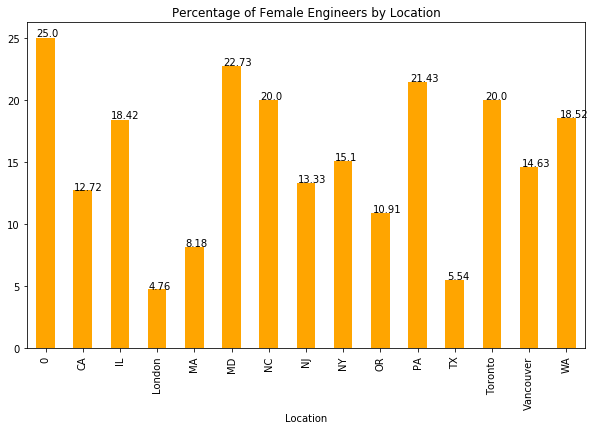

In [50]:
ax = Percentage_byLocation.plot.bar(x='female_eng', y='Location', rot=90, color = 'Orange')
plt.rcParams['figure.figsize']=(10,6)
plt.title('Percentage of Female Engineers by Location')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 3.4 K-means Clusting

### To Predict the Ratio of Female Engineers by Company Categories

In [51]:
# The percentage of female engineers sorted by the value
percentage.sort_values(ascending=False).round(2)

Category
Finance/Venture        19.12
Health/CleanTech       18.10
eCommerce/Fashion      16.89
Consulting             16.22
Analytics/Big Data     14.52
Advertising            14.51
Enterprise             14.07
Social Networking      12.99
News/Media             12.61
Software               12.45
Consumer Web           11.73
Education              11.70
Charity/Nonprofit       8.74
Mobile/Wireless         8.70
Hardware                5.71
Games/Entertainment     3.33
dtype: float64

In [52]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [53]:
# To frame 'percentage_female_byCategory' into X_in
X_in = percentage.to_frame()
X_in.head()

,0
Category,
Advertising,14.507772
Analytics/Big Data,14.516129
Charity/Nonprofit,8.737864
Consulting,16.216216
Consumer Web,11.732974


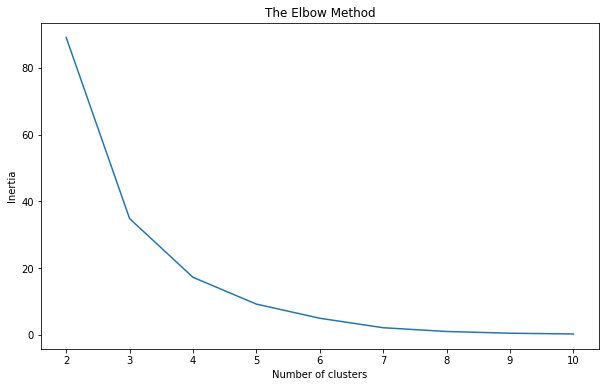

In [54]:
# Using the Elbow method to find the optinal number of clusters
inertias = []
for i in range (2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_in)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 11), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### As the above figure shows, the number of clusters should be 4. 

In [55]:
# Applying k-means to the tech dataset
kmeans = KMeans(n_clusters = 4)

# Fitting
y_kmeans = kmeans.fit_predict(X_in)

# Prediction
prediction_kmeans = kmeans.predict(X_in)
print(prediction_kmeans)

[2 2 3 0 2 2 2 0 1 1 0 3 2 2 2 0]


In [56]:
# Visualising the clusters

# Making a scatter plot of X_ins and y_kmeans
plt.scatter(X_in[y_kmeans == 0, 0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X_in[y_kmeans == 1, 0], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(X_in[y_kmeans == 2, 0], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X_in[y_kmeans == 3, 0], s = 100, c = 'green', label = 'Cluster 4')

# Asign the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Plotting clusters
plt.title('Clusters of Percentage of Female Engineers by Category')
plt.xlabel('Clusters of Female Engineers')

plt.show()

TypeError: '(array([False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True]), 0)' is an invalid key

In [ ]:
centroids


## 4. Analysis

__Instructions from Final_Project.pdf:__
- Summarize the results of the analysis without discussing
their implications

In [57]:
pc_low = tech[(tech.Category.isin(['Games/Entertainment', 'Hardware']))]
pc_low

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
2,Activision,1,29,30,3.33,706.0,CA,0.0,Games/Entertainment,96.666667
74,"Qualcomm, Austin",15,256,271,5.54,500.0,TX,0.0,Hardware,94.464945
90,Sifteo,0,4,4,0.00,25.0,CA,16.5,Hardware,100.000000
107,Tindie,1,4,5,20.00,10.0,CA,0.5,Hardware,80.000000


In [58]:
pc_high = tech[(tech.Category.isin(['Finance/Venture', 'Consulting', 'eCommerce/Fashion', 'Health/CleanTech']))]
pc_high

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
10,Checkout 51,0,6,6,0.00,46.0,Ontario,0.00,Health/CleanTech,100.000000
17,Datascope Analytics,2,5,7,28.57,8.0,IL,0.00,Consulting,71.428571
19,doxo,0,7,7,0.00,18.0,WA,18.80,eCommerce/Fashion,100.000000
22,elationemr,1,3,4,25.00,13.0,CA,0.00,Health/CleanTech,75.000000
24,Etsy,19,130,149,12.75,300.0,NY,91.70,eCommerce/Fashion,87.248322
26,Flatiron Health,1,6,7,14.29,24.0,NY,8.00,Health/CleanTech,85.714286
33,Goldbely,0,3,3,0.00,5.0,CA,3.00,eCommerce/Fashion,100.000000
46,Indiegogo,4,12,16,25.00,185.0,CA,56.60,Finance/Venture,75.000000
52,Kiva,3,21,24,12.50,291.0,CA,9.00,Finance/Venture,87.500000
65,OmniTI,5,17,22,22.73,50.0,MD,0.00,Consulting,77.272727


#### Findings
_Rami Comment: These findings can be moved to chapter 4. Analysis._

As can be found from the data the top 3 company categories with the highest percentage of female engineers are:

- Finance/Venture 19.12 %
- Health/CleanTech 18.10 % 
- eCommerce/Fashion 16.89 %

The company categories with the lowest percentage of female engineers are as follows:

- Games/Entertainment 3.33 %
- Hardware 5.71 %
- Mobile/Wireless 8.7 %

It its worth noting the low percentage of female engineers in the Games/Entertainment category.

## 5. Conclusion

__Instructions from Final_Project.pdf:__
- Interpret and explain your results
- Did the study answer your questions?

## 6. References

__References__

- Siegel, T. 2014. Women-in-tech. Comma-separated values file. URL: https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv. Accessed: March 2020.

All of the data used in this project comes from Tara Siegel's dataset. For further description of the material please see chapter 2. Dataset.

- The Shortcut Oy. 2020. Python for Data Analysis training program. Helsinki, Finland.

The primary source of the programming language, the various techniques and their application was gained from Python for Data Analysis training program.

__Thanks__

The authors wish to thank all of the instructors of the Python Training Program! It is because of their expertise of Python and Machine Learning and their willingness to help us to learn and apply our knowledge that this project could be made a reality! Thank you all so much!

The authors would also like to thank the organizers of the Python Training Program! You have made it all possible by creating the program, scheduled the contents, provided the premises (both physical and digital workspaces). Also, you have asked us for our feedback and implemented changes based on that. Thank you everyone at The Shortcut Oy!

Finally thank you dear reader for your interest in this final project made by Team "Diversity-in-Tech"!